# Introduction

This notebook provides a comprehensive analysis of football (soccer) data from six major European leagues: Bundesliga, Eredivisie, La Liga, Ligue 1, Premier League, and Serie A. The dataset includes various performance metrics such as points, goals scored, goals conceded, possession percentage, pass accuracy, and more. The analysis aims to uncover insights into team performance, league comparisons, and the impact of various factors like possession, injuries, and player recruitment on team success.

Key Objectives:
Data Understanding: Explore the dataset to understand its structure, data types, and missing values.

Data Cleaning: Handle missing values and duplicates to ensure data quality.

Exploratory Data Analysis (EDA): Analyze distributions, correlations, and outliers in the data.

Club-Specific Analysis: Identify top-performing clubs based on points, goals scored, clean sheets, possession, and pass accuracy.

League-Specific Analysis: Compare average performance metrics across different leagues.

Advanced Analysis: Investigate the relationship between possession, pass accuracy, and team success, as well as the impact of injuries and player recruitment on performance

# Iniatial

1. Import Necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Datasets


In [ ]:
# Load datasets and add 'league' column
bundesliga = pd.read_csv('BL.csv')
bundesliga['league'] = 'Bundesliga'
eredivisie = pd.read_csv('Eredivisie.csv')
eredivisie['league'] = 'Eredivisie'
laliga = pd.read_csv('LaLiga.csv')
laliga['league'] = 'La Liga'
ligue1 = pd.read_csv('ligue1.csv')
ligue1['league'] = 'Ligue 1'
premier_league = pd.read_csv('PL.csv')
premier_league['league'] = 'Premier League'
serie_a = pd.read_csv('SerieA.csv')
serie_a['league'] = 'Serie A'
# Standardize column names in each dataset
def standardize_column_names(df):
 df.columns = df.columns.str.replace('possession(%)', 'possession(%)')
 df.columns = df.columns.str.replace('pass_accuracy(%)',
'pass_accuracy (%)')
 return df
# Apply the function to each dataset
bundesliga = standardize_column_names(bundesliga)
eredivisie = standardize_column_names(eredivisie)
laliga = standardize_column_names(laliga)
ligue1 = standardize_column_names(ligue1)
premier_league = standardize_column_names(premier_league)
serie_a = standardize_column_names(serie_a)


In [ ]:
# Concatenate all datasets
all_leagues = pd.concat([bundesliga, eredivisie, laliga, ligue1,
premier_league, serie_a])

In [ ]:
all_leagues.columns

Index(['id', 'club', 'season', 'matches_played', 'wins', 'draws', 'losses',
       'goals_scored', 'goals_conceded', 'goal_difference', 'points',
       'top_scorer', 'clean_sheets', 'possession (%)', 'pass_accuracy (%)',
       'shots_per_match', 'fouls_committed', 'yellow_cards', 'red_cards',
       'total_injuries', 'recruited_players', 'total_attacks_left',
       'total_attacks_middle', 'total_attacks_right', 'conceded_attacks_left',
       'conceded_attacks_middle', 'conceded_attacks_right', 'league',
       'possession(%)'],
      dtype='object')

In [ ]:
# Count the number of duplicate rows
duplicate_count = all_leagues.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display duplicate rows if they exist
if duplicate_count > 0:
    duplicate_rows = all_leagues[all_leagues.duplicated()]
    print("Duplicate Rows:")
    print(duplicate_rows)


Number of duplicate rows: 0


In [ ]:
all_leagues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 19
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       116 non-null    int64  
 1   club                     116 non-null    object 
 2   season                   116 non-null    object 
 3   matches_played           116 non-null    int64  
 4   wins                     116 non-null    int64  
 5   draws                    116 non-null    int64  
 6   losses                   116 non-null    int64  
 7   goals_scored             116 non-null    int64  
 8   goals_conceded           116 non-null    int64  
 9   goal_difference          116 non-null    int64  
 10  points                   116 non-null    int64  
 11  top_scorer               116 non-null    object 
 12  clean_sheets             116 non-null    int64  
 13  possession (%)           96 non-null     float64
 14  pass_accuracy (%)        116 non

# 3. Data Preprocessing

In [ ]:
# Standardize column names
def standardize_column_names(df):
    df.columns = df.columns.str.replace('possession(%)', 'possession(%)')
    df.columns = df.columns.str.replace('pass_accuracy(%)', 'pass_accuracy(%)')
    return df

all_leagues = standardize_column_names(all_leagues)

# Handle missing values
def handle_missing_values(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
    return df

all_leagues = handle_missing_values(all_leagues)

# Remove duplicates
all_leagues = all_leagues.drop_duplicates()

#4. Data Understanding


In [ ]:
# Check the first few rows
print(all_leagues.head())

# Check data types and missing values
print(all_leagues.info())

# Summary statistics
print(all_leagues.describe())

# Check for missing values
print(all_leagues.isnull().sum())

   id               club   season  matches_played  wins  draws  losses  \
0   1      Bayern Munich  2022-23              34    21      8       5   
1   2  Borussia Dortmund  2022-23              34    22      5       7   
2   3         RB Leipzig  2022-23              34    20      6       8   
3   4       Union Berlin  2022-23              34    18      8       8   
4   5        SC Freiburg  2022-23              34    17      8       9   

   goals_scored  goals_conceded  goal_difference  ...  total_injuries  \
0            92              38               54  ...              12   
1            83              44               39  ...              14   
2            64              41               23  ...              15   
3            51              38               13  ...              12   
4            51              44                7  ...              13   

  recruited_players  total_attacks_left  total_attacks_middle  \
0                 5                 140            

In [ ]:
# Identify categorical columns
categorical_cols = all_leagues.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['club', 'season', 'top_scorer', 'league'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    all_leagues[col] = le.fit_transform(all_leagues[col])
    label_encoders[col] = le  # Save encoder for future reference

print("Label Encoding Applied.")


Label Encoding Applied.


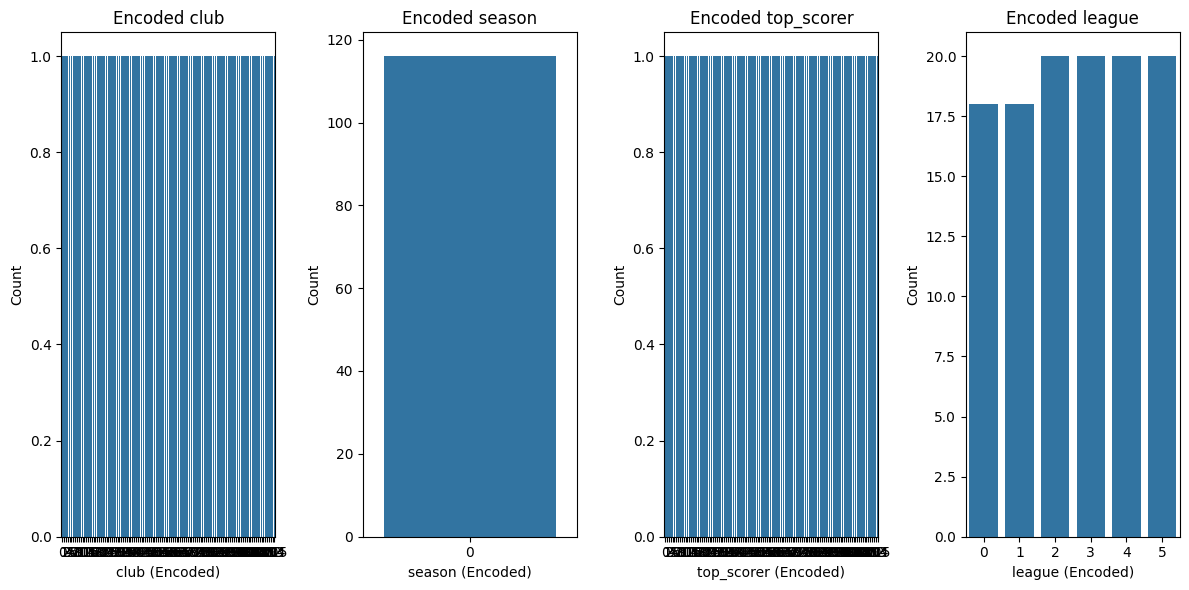

In [ ]:
# Plot the encoded categorical columns
plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(x=all_leagues[col])
    plt.title(f"Encoded {col}")
    plt.xlabel(f"{col} (Encoded)")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
# Identify numerical columns
numeric_cols = all_leagues.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numeric_cols)
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
all_leagues[numeric_cols] = scaler.fit_transform(all_leagues[numeric_cols])

print("Min-Max Normalization Applied.")


Numerical Columns: Index(['id', 'club', 'season', 'matches_played', 'wins', 'draws', 'losses',
       'goals_scored', 'goals_conceded', 'goal_difference', 'points',
       'top_scorer', 'clean_sheets', 'possession (%)', 'pass_accuracy (%)',
       'shots_per_match', 'fouls_committed', 'yellow_cards', 'red_cards',
       'total_injuries', 'recruited_players', 'total_attacks_left',
       'total_attacks_middle', 'total_attacks_right', 'conceded_attacks_left',
       'conceded_attacks_middle', 'conceded_attacks_right', 'league',
       'possession(%)'],
      dtype='object')
Min-Max Normalization Applied.


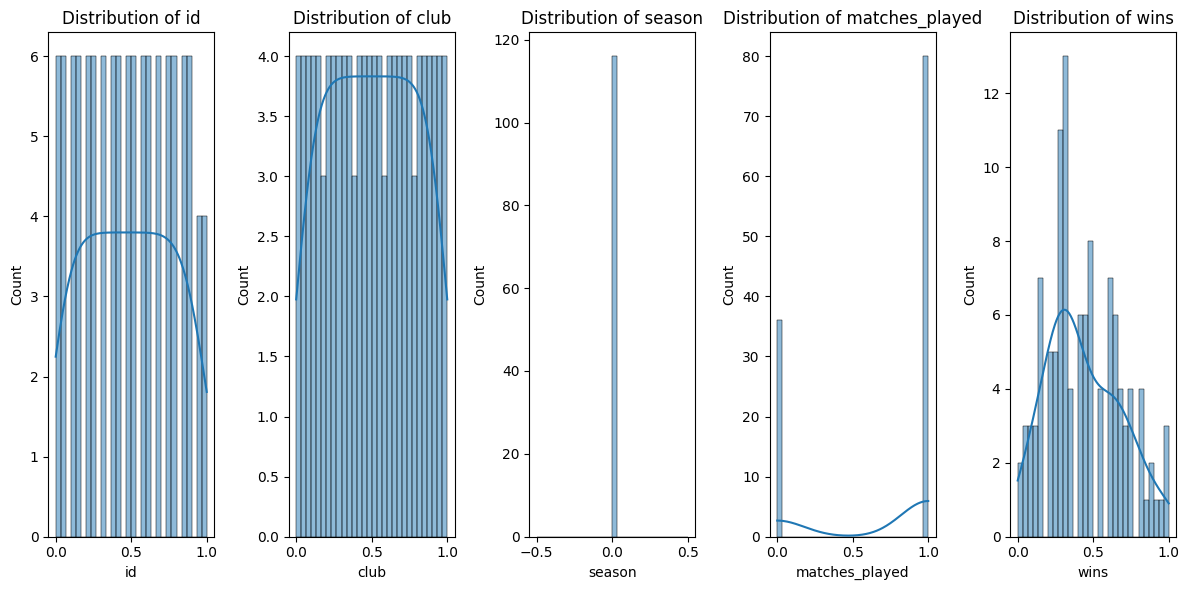

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of normalized data
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:5], 1):  # Visualize first 5 features
    plt.subplot(1, 5, i)
    sns.histplot(all_leagues[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


#5. Exploratory Data Analysis (EDA)


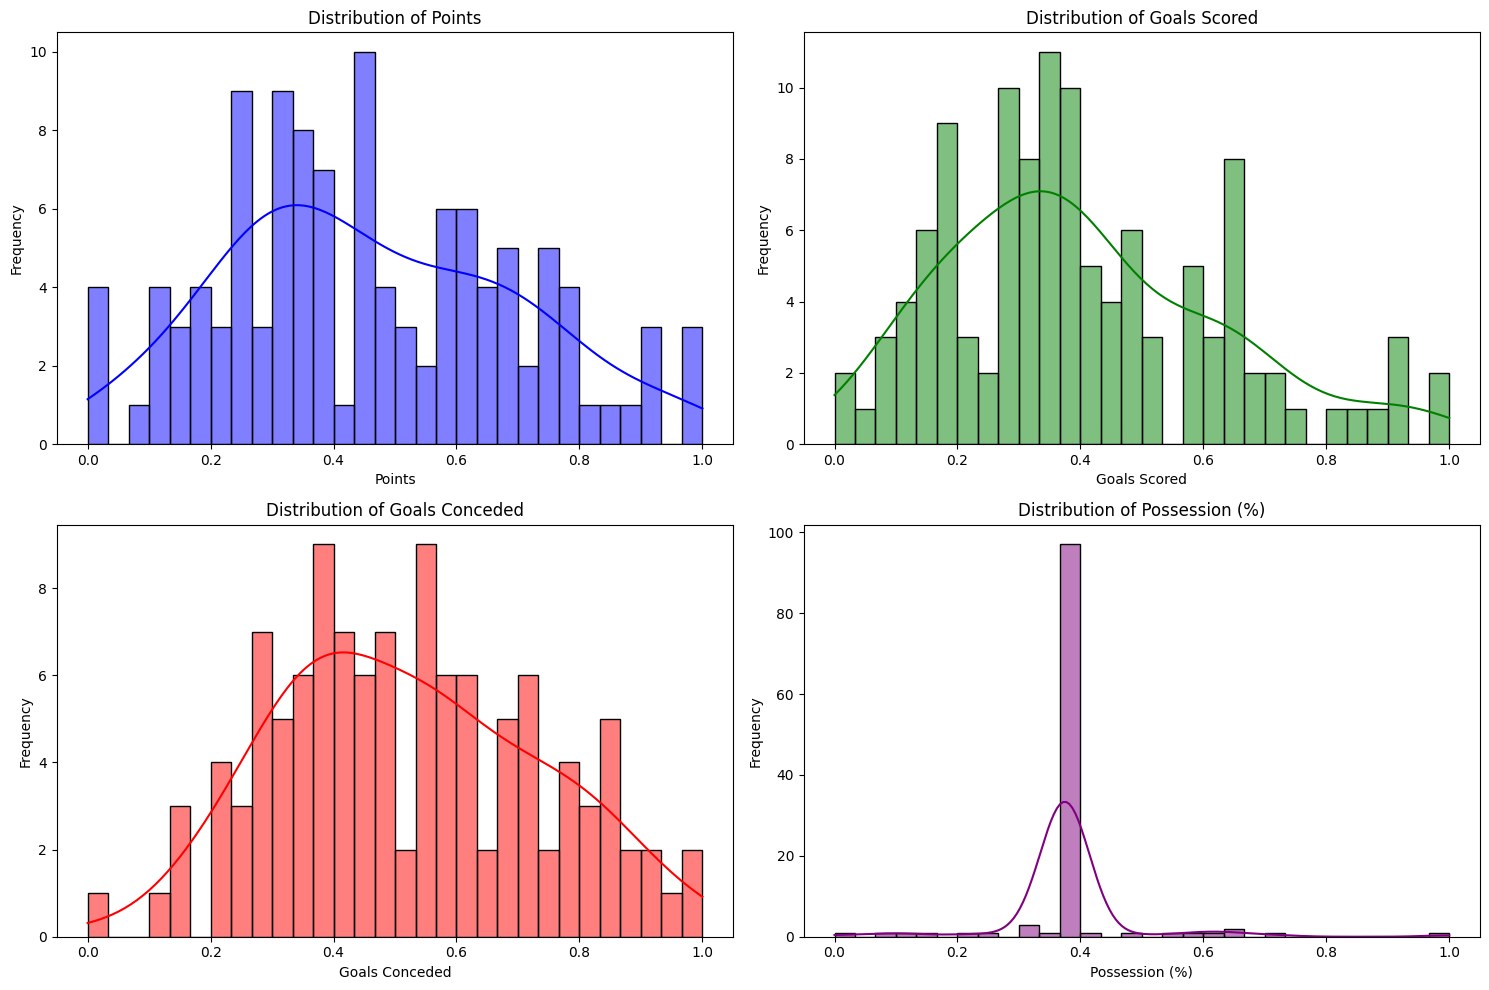

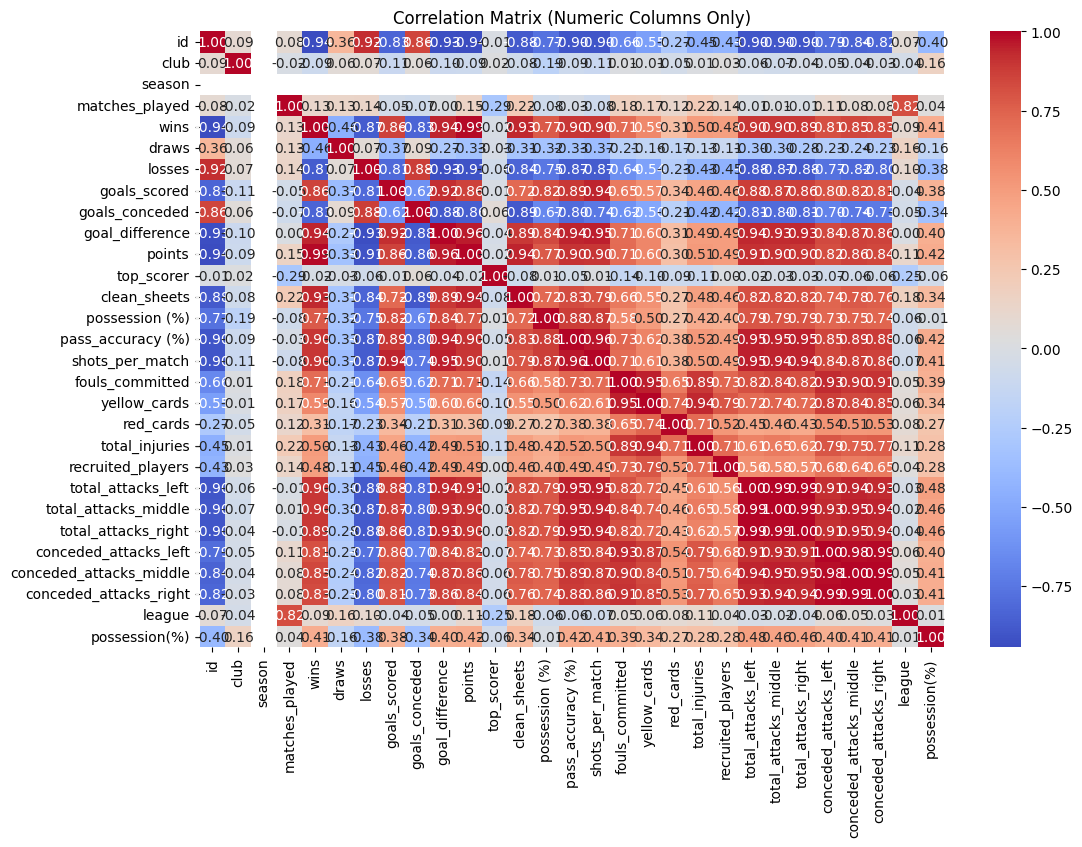

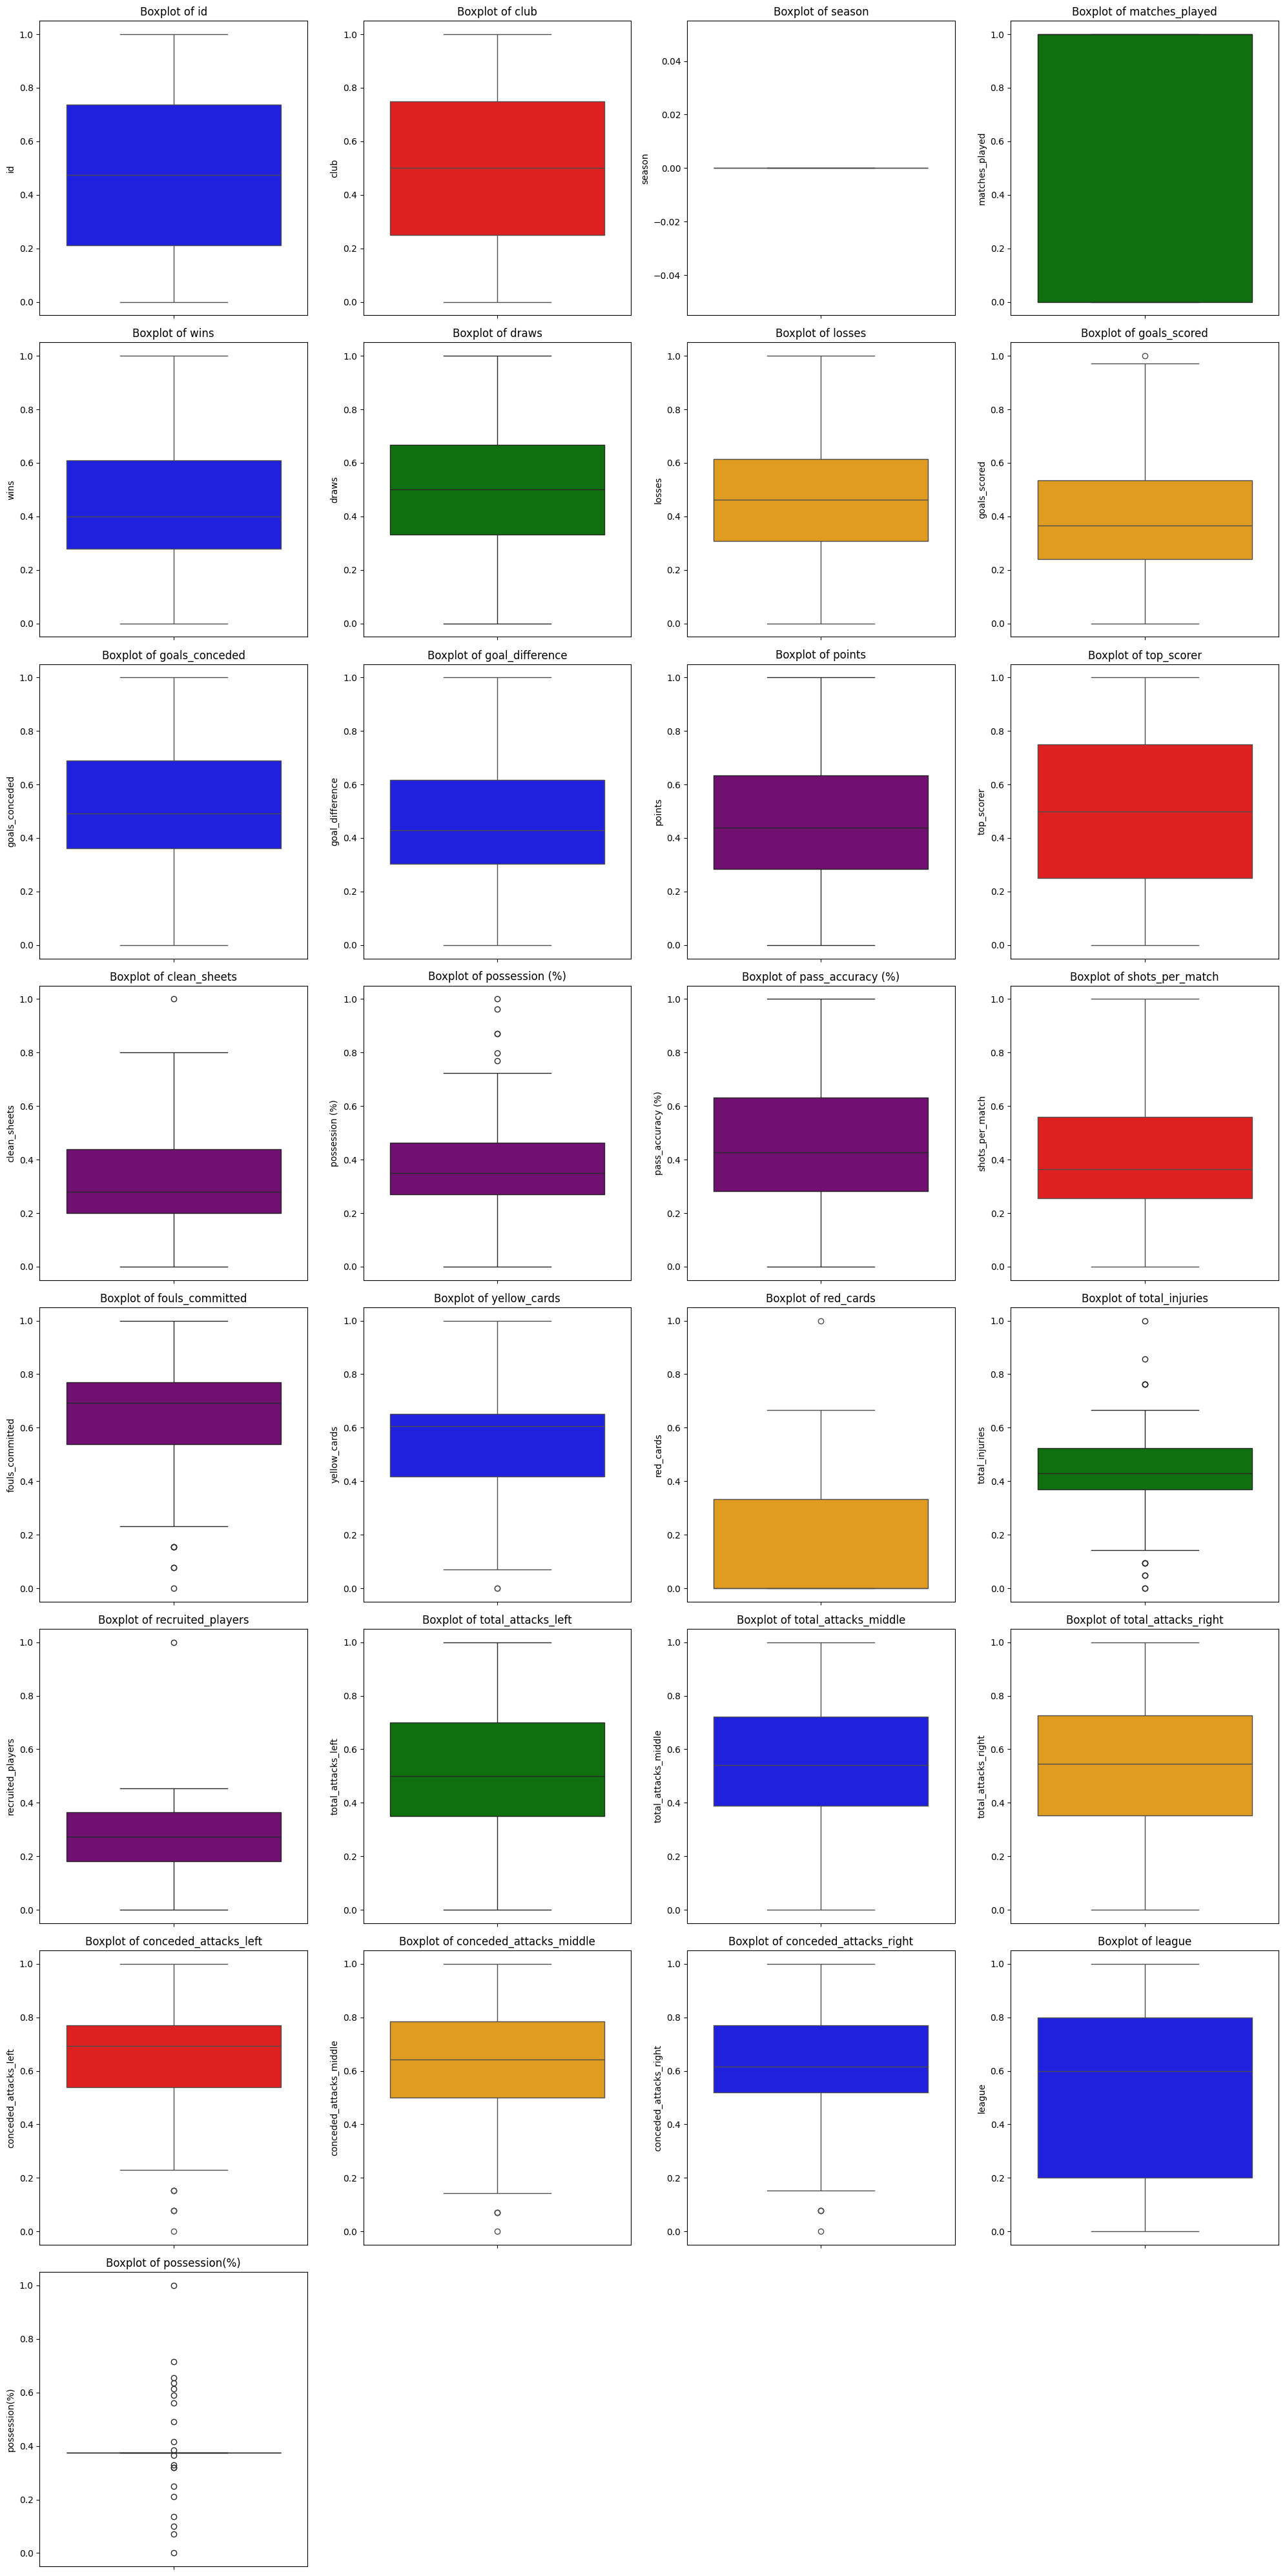

In [ ]:
# Distribution of key numerical variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(all_leagues['points'], bins=30, kde=True, color='blue')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(all_leagues['goals_scored'], bins=30, kde=True, color='green')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(all_leagues['goals_conceded'], bins=30, kde=True, color='red')
plt.title('Distribution of Goals Conceded')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(all_leagues['possession(%)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Possession (%)')
plt.xlabel('Possession (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
numeric_columns = all_leagues.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

# Check for outliers
numeric_columns = all_leagues.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_columns)
num_cols_per_row = 4
num_rows = (num_cols // num_cols_per_row) + (num_cols % num_cols_per_row > 0)

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.boxplot(y=all_leagues[col], color=np.random.choice(['blue', 'green', 'red', 'purple', 'orange']))
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

<ipython-input-19-be82342ee3ec>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')


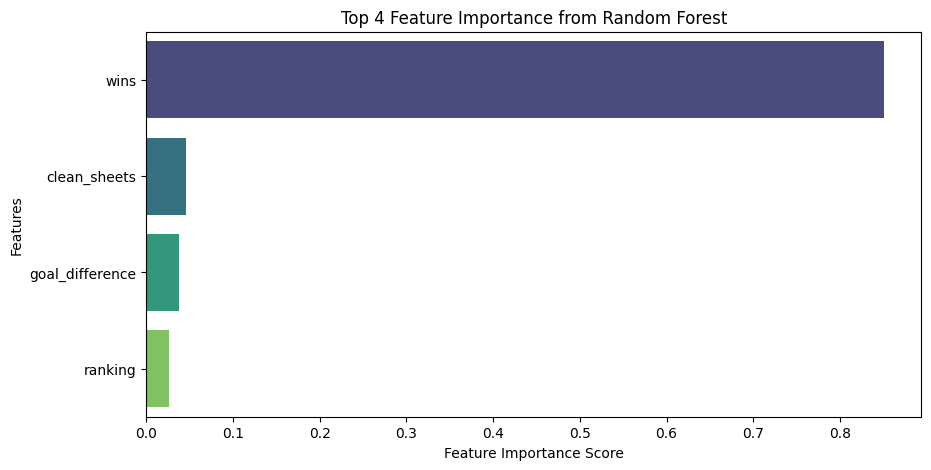

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace 'id' with 'ranking' in the dataset
all_leagues = all_leagues.rename(columns={'id': 'ranking'})

# Define features and target
X = all_leagues.drop(columns=['points'])  # Exclude target variable
y = all_leagues['points']  # Target variable (continuous)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(4)  # Select top 4

# Plot top 4 feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 4 Feature Importance from Random Forest")
plt.show()


#6. Club-Specific Analysis


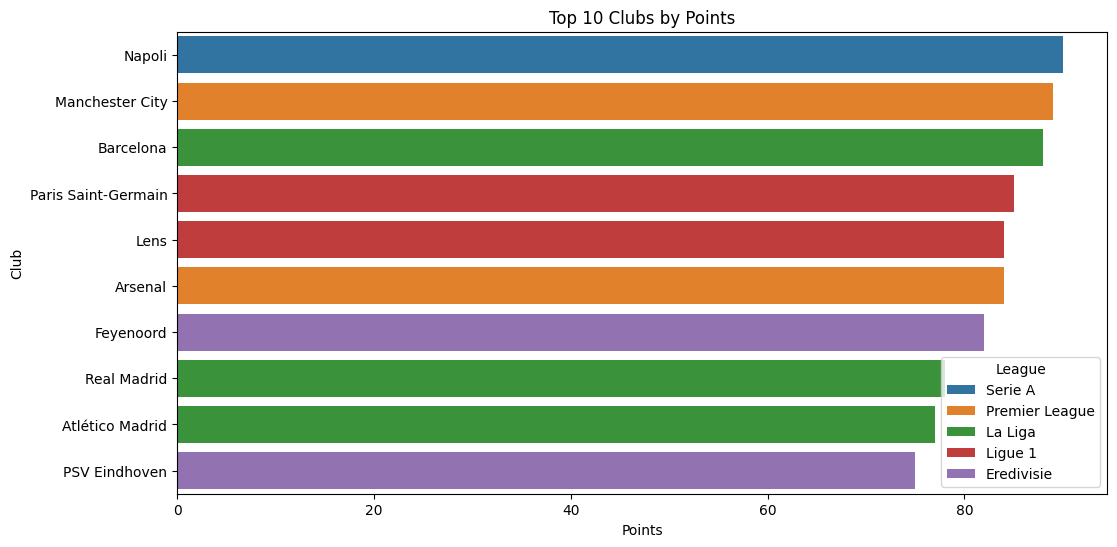

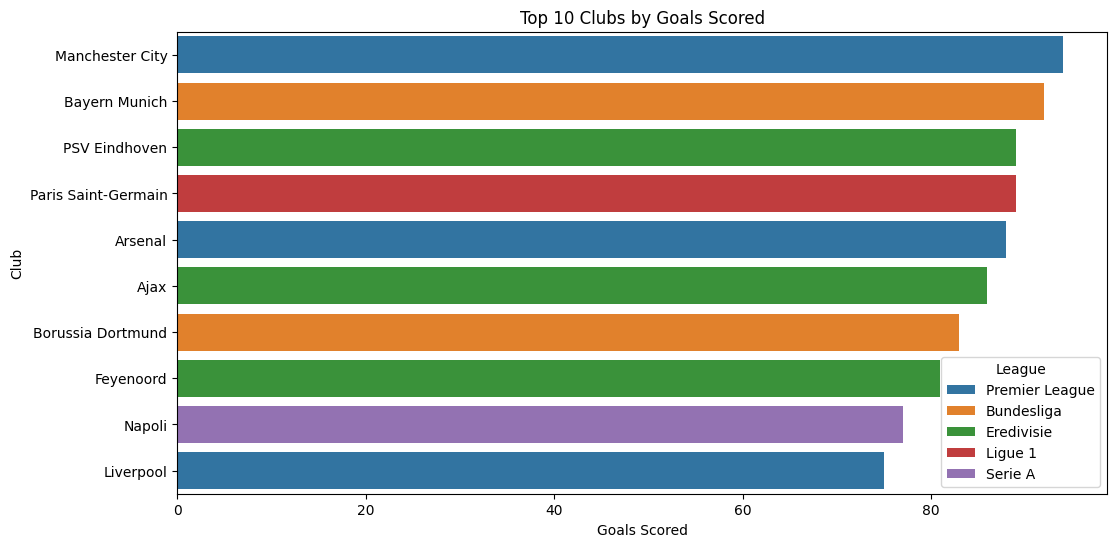

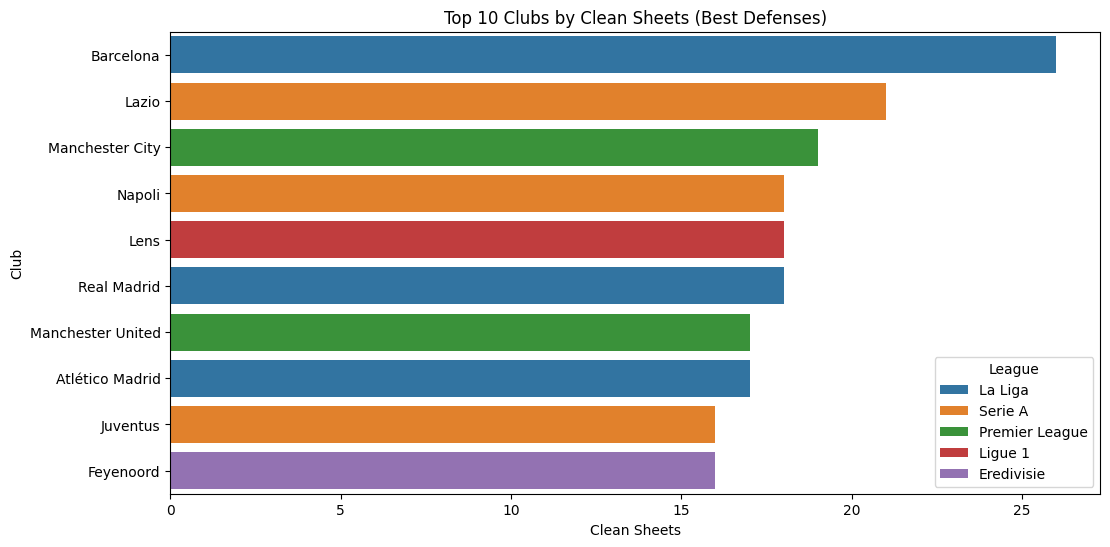

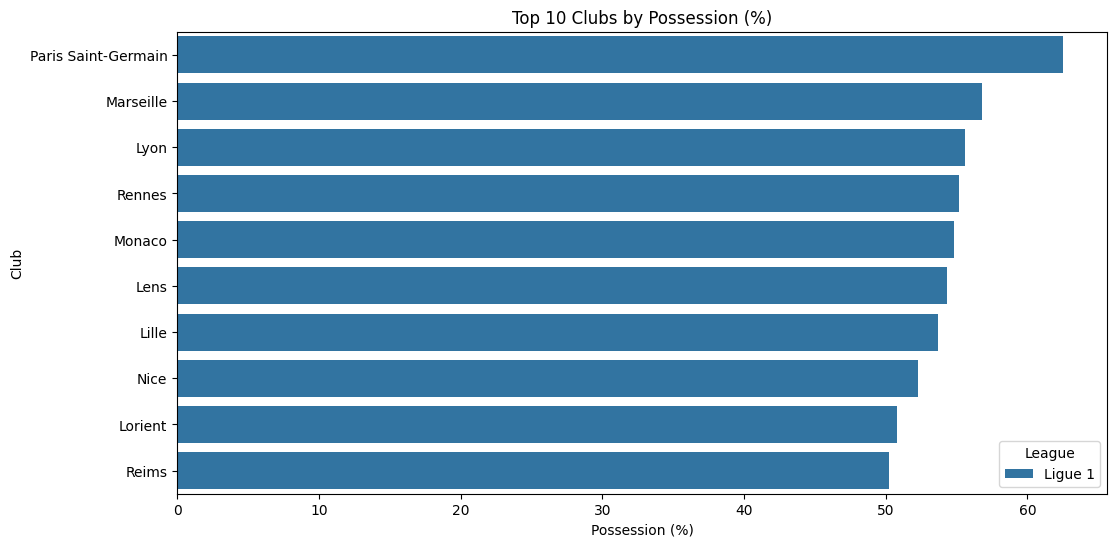

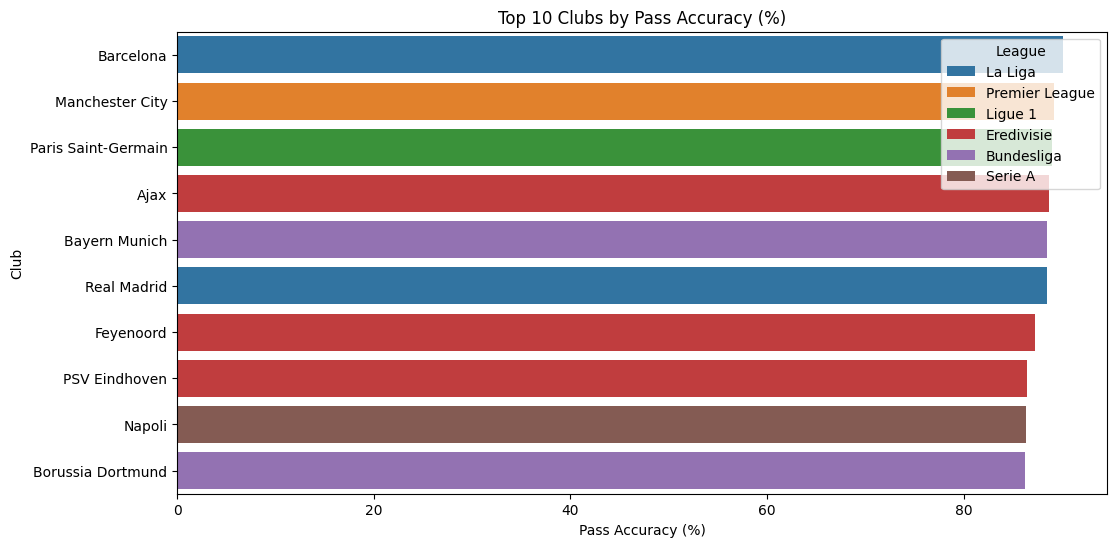

In [ ]:
# Top 10 clubs by points
top_clubs_points = all_leagues.sort_values(by='points', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='points', y='club', data=top_clubs_points, hue='league', dodge=False)
plt.title("Top 10 Clubs by Points")
plt.xlabel("Points")
plt.ylabel("Club")
plt.legend(title="League")
plt.show()

# Top 10 clubs by goals scored
top_clubs_goals = all_leagues.sort_values(by='goals_scored', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='goals_scored', y='club', data=top_clubs_goals, hue='league', dodge=False)
plt.title("Top 10 Clubs by Goals Scored")
plt.xlabel("Goals Scored")
plt.ylabel("Club")
plt.legend(title="League")
plt.show()

# Top 10 clubs by clean sheets
top_clubs_clean_sheets = all_leagues.sort_values(by='clean_sheets', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='clean_sheets', y='club', data=top_clubs_clean_sheets, hue='league', dodge=False)
plt.title("Top 10 Clubs by Clean Sheets (Best Defenses)")
plt.xlabel("Clean Sheets")
plt.ylabel("Club")
plt.legend(title="League")
plt.show()

# Top 10 clubs by possession (%)
top_clubs_possession = all_leagues.sort_values(by='possession(%)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='possession(%)', y='club', data=top_clubs_possession, hue='league', dodge=False)
plt.title("Top 10 Clubs by Possession (%)")
plt.xlabel("Possession (%)")
plt.ylabel("Club")
plt.legend(title="League")
plt.show()

# Top 10 clubs by pass accuracy (%)
top_clubs_pass_accuracy = all_leagues.sort_values(by='pass_accuracy (%)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='pass_accuracy (%)', y='club', data=top_clubs_pass_accuracy, hue='league', dodge=False)
plt.title("Top 10 Clubs by Pass Accuracy (%)")
plt.xlabel("Pass Accuracy (%)")
plt.ylabel("Club")
plt.legend(title="League")
plt.show()

#7. League-Specific Analysis


League Statistics:
           league     points  goals_scored  goals_conceded  possession(%)  \
0      Bundesliga  46.833333     53.944444       53.944444          50.00   
1      Eredivisie  46.444444     51.722222       52.222222          50.00   
2         La Liga  52.550000     47.750000       47.750000          50.00   
3         Ligue 1  52.400000     53.350000       53.350000          50.66   
4  Premier League  52.650000     54.200000       54.200000          50.00   
5         Serie A  51.500000     48.700000       48.700000          50.00   

   pass_accuracy (%)  
0          81.755556  
1          80.811111  
2          81.270000  
3          81.360000  
4          80.640000  
5          80.905000  


<ipython-input-15-fcfcb7949ab6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='league', y='points', data=league_stats, palette='viridis')


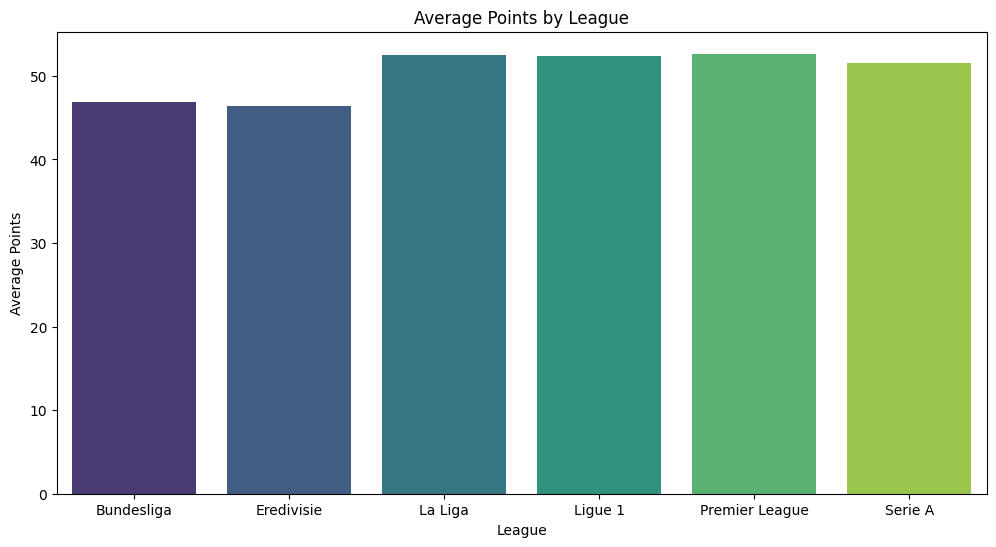

In [ ]:
# Group by league and calculate mean values
league_stats = all_leagues.groupby('league')[['points', 'goals_scored', 'goals_conceded', 'possession(%)', 'pass_accuracy (%)']].mean().reset_index()
print("League Statistics:")
print(league_stats)

# League comparison visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='league', y='points', data=league_stats, palette='viridis')
plt.title("Average Points by League")
plt.xlabel("League")
plt.ylabel("Average Points")
plt.show()

#8. Advanced Analysis


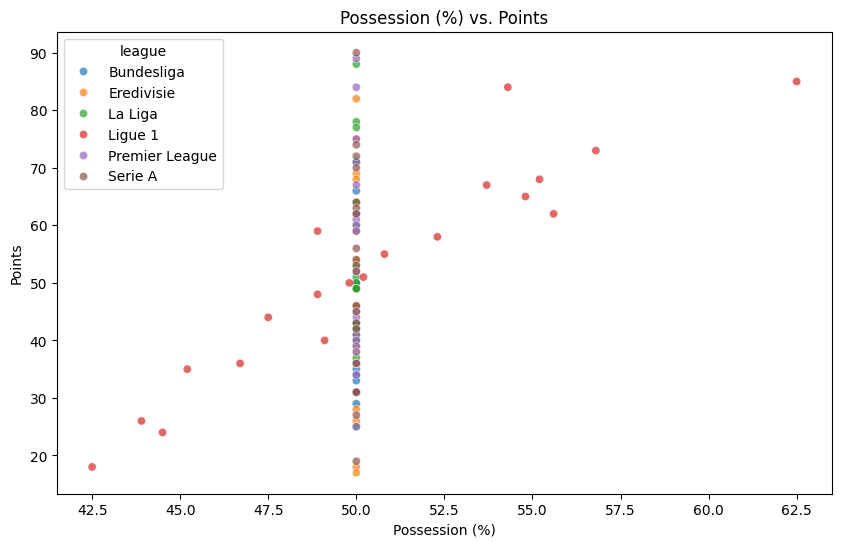

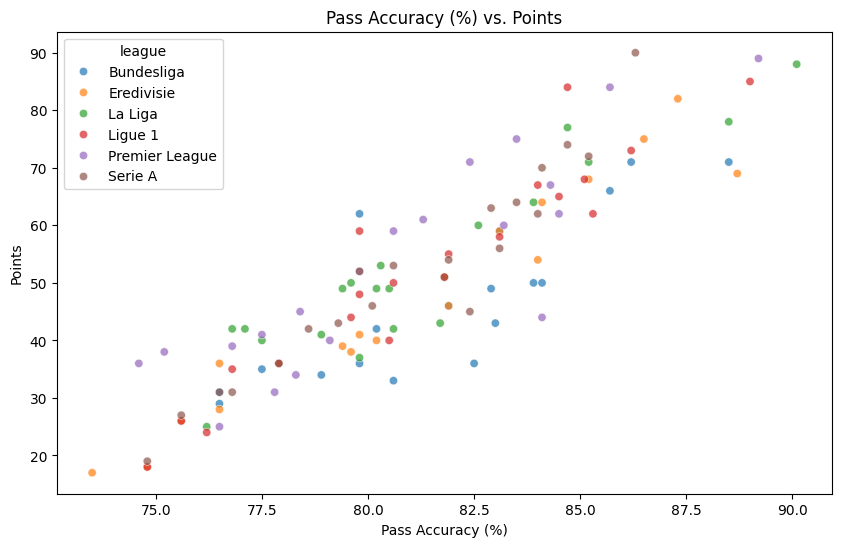

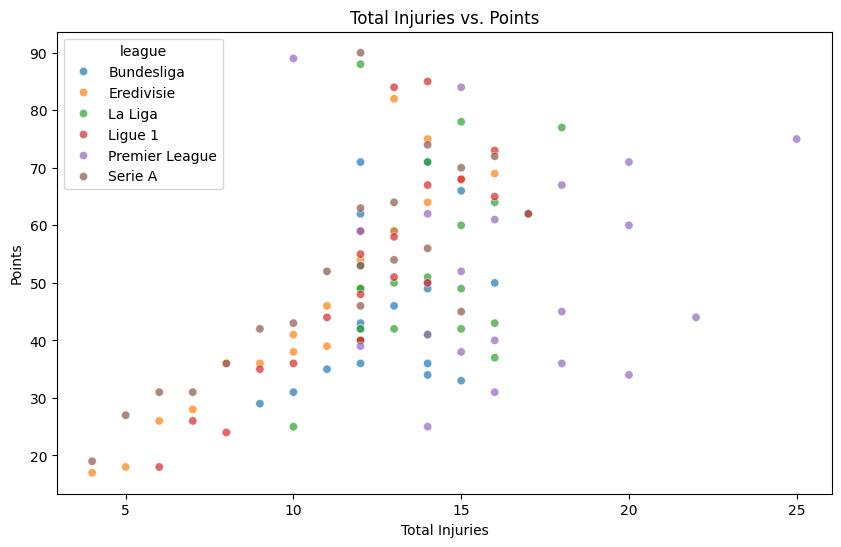

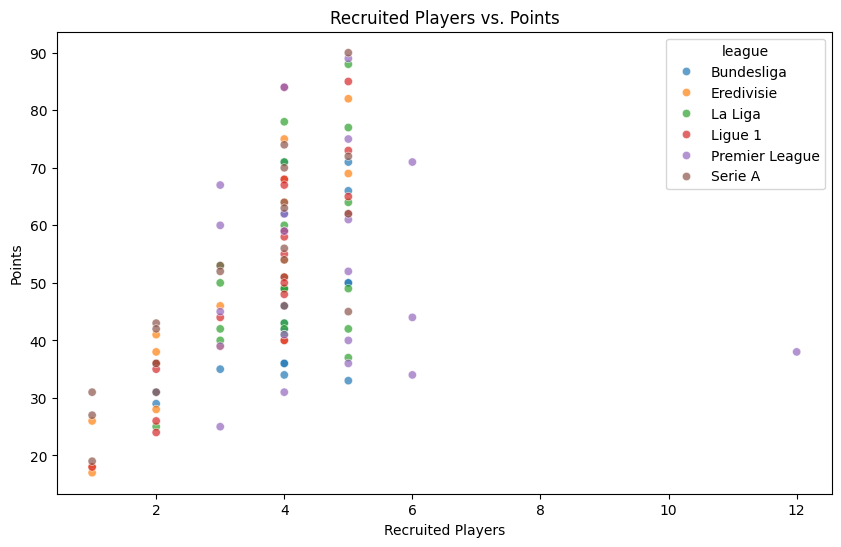

In [ ]:
# Scatter plot: Possession (%) vs. Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='possession(%)', y='points', data=all_leagues, hue='league', alpha=0.7)
plt.title("Possession (%) vs. Points")
plt.xlabel("Possession (%)")
plt.ylabel("Points")
plt.show()

# Scatter plot: Pass Accuracy (%) vs. Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pass_accuracy (%)', y='points', data=all_leagues, hue='league', alpha=0.7)
plt.title("Pass Accuracy (%) vs. Points")
plt.xlabel("Pass Accuracy (%)")
plt.ylabel("Points")
plt.show()

# Scatter plot: Total Injuries vs. Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_injuries', y='points', data=all_leagues, hue='league', alpha=0.7)
plt.title("Total Injuries vs. Points")
plt.xlabel("Total Injuries")
plt.ylabel("Points")
plt.show()

# Scatter plot: Recruited Players vs. Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recruited_players', y='points', data=all_leagues, hue='league', alpha=0.7)
plt.title("Recruited Players vs. Points")
plt.xlabel("Recruited Players")
plt.ylabel("Points")
plt.show()